In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# import data
df=pd.read_csv('/content/chennai_housing_price.csv')

In [3]:
df.head()

,Unnamed: 0,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7109 non-null   int64  
 1   PRT_ID         7109 non-null   object 
 2   AREA           7109 non-null   object 
 3   INT_SQFT       7109 non-null   int64  
 4   DATE_SALE      7109 non-null   object 
 5   DIST_MAINROAD  7109 non-null   int64  
 6   N_BEDROOM      7108 non-null   float64
 7   N_BATHROOM     7104 non-null   float64
 8   N_ROOM         7109 non-null   int64  
 9   SALE_COND      7109 non-null   object 
 10  PARK_FACIL     7109 non-null   object 
 11  DATE_BUILD     7109 non-null   object 
 12  BUILDTYPE      7109 non-null   object 
 13  UTILITY_AVAIL  7109 non-null   object 
 14  STREET         7109 non-null   object 
 15  MZZONE         7109 non-null   object 
 16  QS_ROOMS       7109 non-null   float64
 17  QS_BATHROOM    7109 non-null   float64
 18  QS_BEDRO

# feature_engineering

In [6]:
df.columns=[i.lower() for i in df.columns]

In [7]:
# remove unnecessary columns
df1=df.drop(['unnamed: 0','prt_id'],axis=1)

In [8]:
df1=df1.drop(['reg_fee','commis','sales_price'],axis=1)
df1['price']=df['reg_fee']+df['commis']+df['sales_price']

In [9]:
# check for null values
df1.isna().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
price             0
dtype: int64

In [10]:
df1=df1.dropna()

In [11]:
df1.describe()

,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,price
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,1.140579e+07
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,3.945567e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.253935e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.639780e+06
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.080447e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.360245e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.496904e+07


In [12]:
df1.corr()

,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,price
int_sqft,1.000000,0.002267,0.786721,0.517103,0.951305,0.020495,-0.007249,0.009643,0.013830,0.620543
dist_mainroad,0.002267,1.000000,-0.001938,0.002496,0.002313,0.002739,-0.030999,0.001141,-0.017482,0.017862
n_bedroom,0.786721,-0.001938,1.000000,0.756016,0.840654,0.015508,-0.006461,0.015810,0.013932,0.342891
n_bathroom,0.517103,0.002496,0.756016,1.000000,0.570110,0.013487,-0.011091,0.012278,0.007858,0.120698
n_room,0.951305,0.002313,0.840654,0.570110,1.000000,0.016710,-0.006636,0.015618,0.015234,0.609996
qs_rooms,0.020495,0.002739,0.015508,0.013487,0.016710,1.000000,0.009111,0.009570,0.517906,0.022213
qs_bathroom,-0.007249,-0.030999,-0.006461,-0.011091,-0.006636,0.009111,1.000000,-0.012320,0.551172,-0.012080
qs_bedroom,0.009643,0.001141,0.015810,0.012278,0.015618,0.009570,-0.012320,1.000000,0.630583,0.020403
qs_overall,0.013830,-0.017482,0.013932,0.007858,0.015234,0.517906,0.551172,0.630583,1.000000,0.020580
price,0.620543,0.017862,0.342891,0.120698,0.609996,0.022213,-0.012080,0.020403,0.020580,1.000000


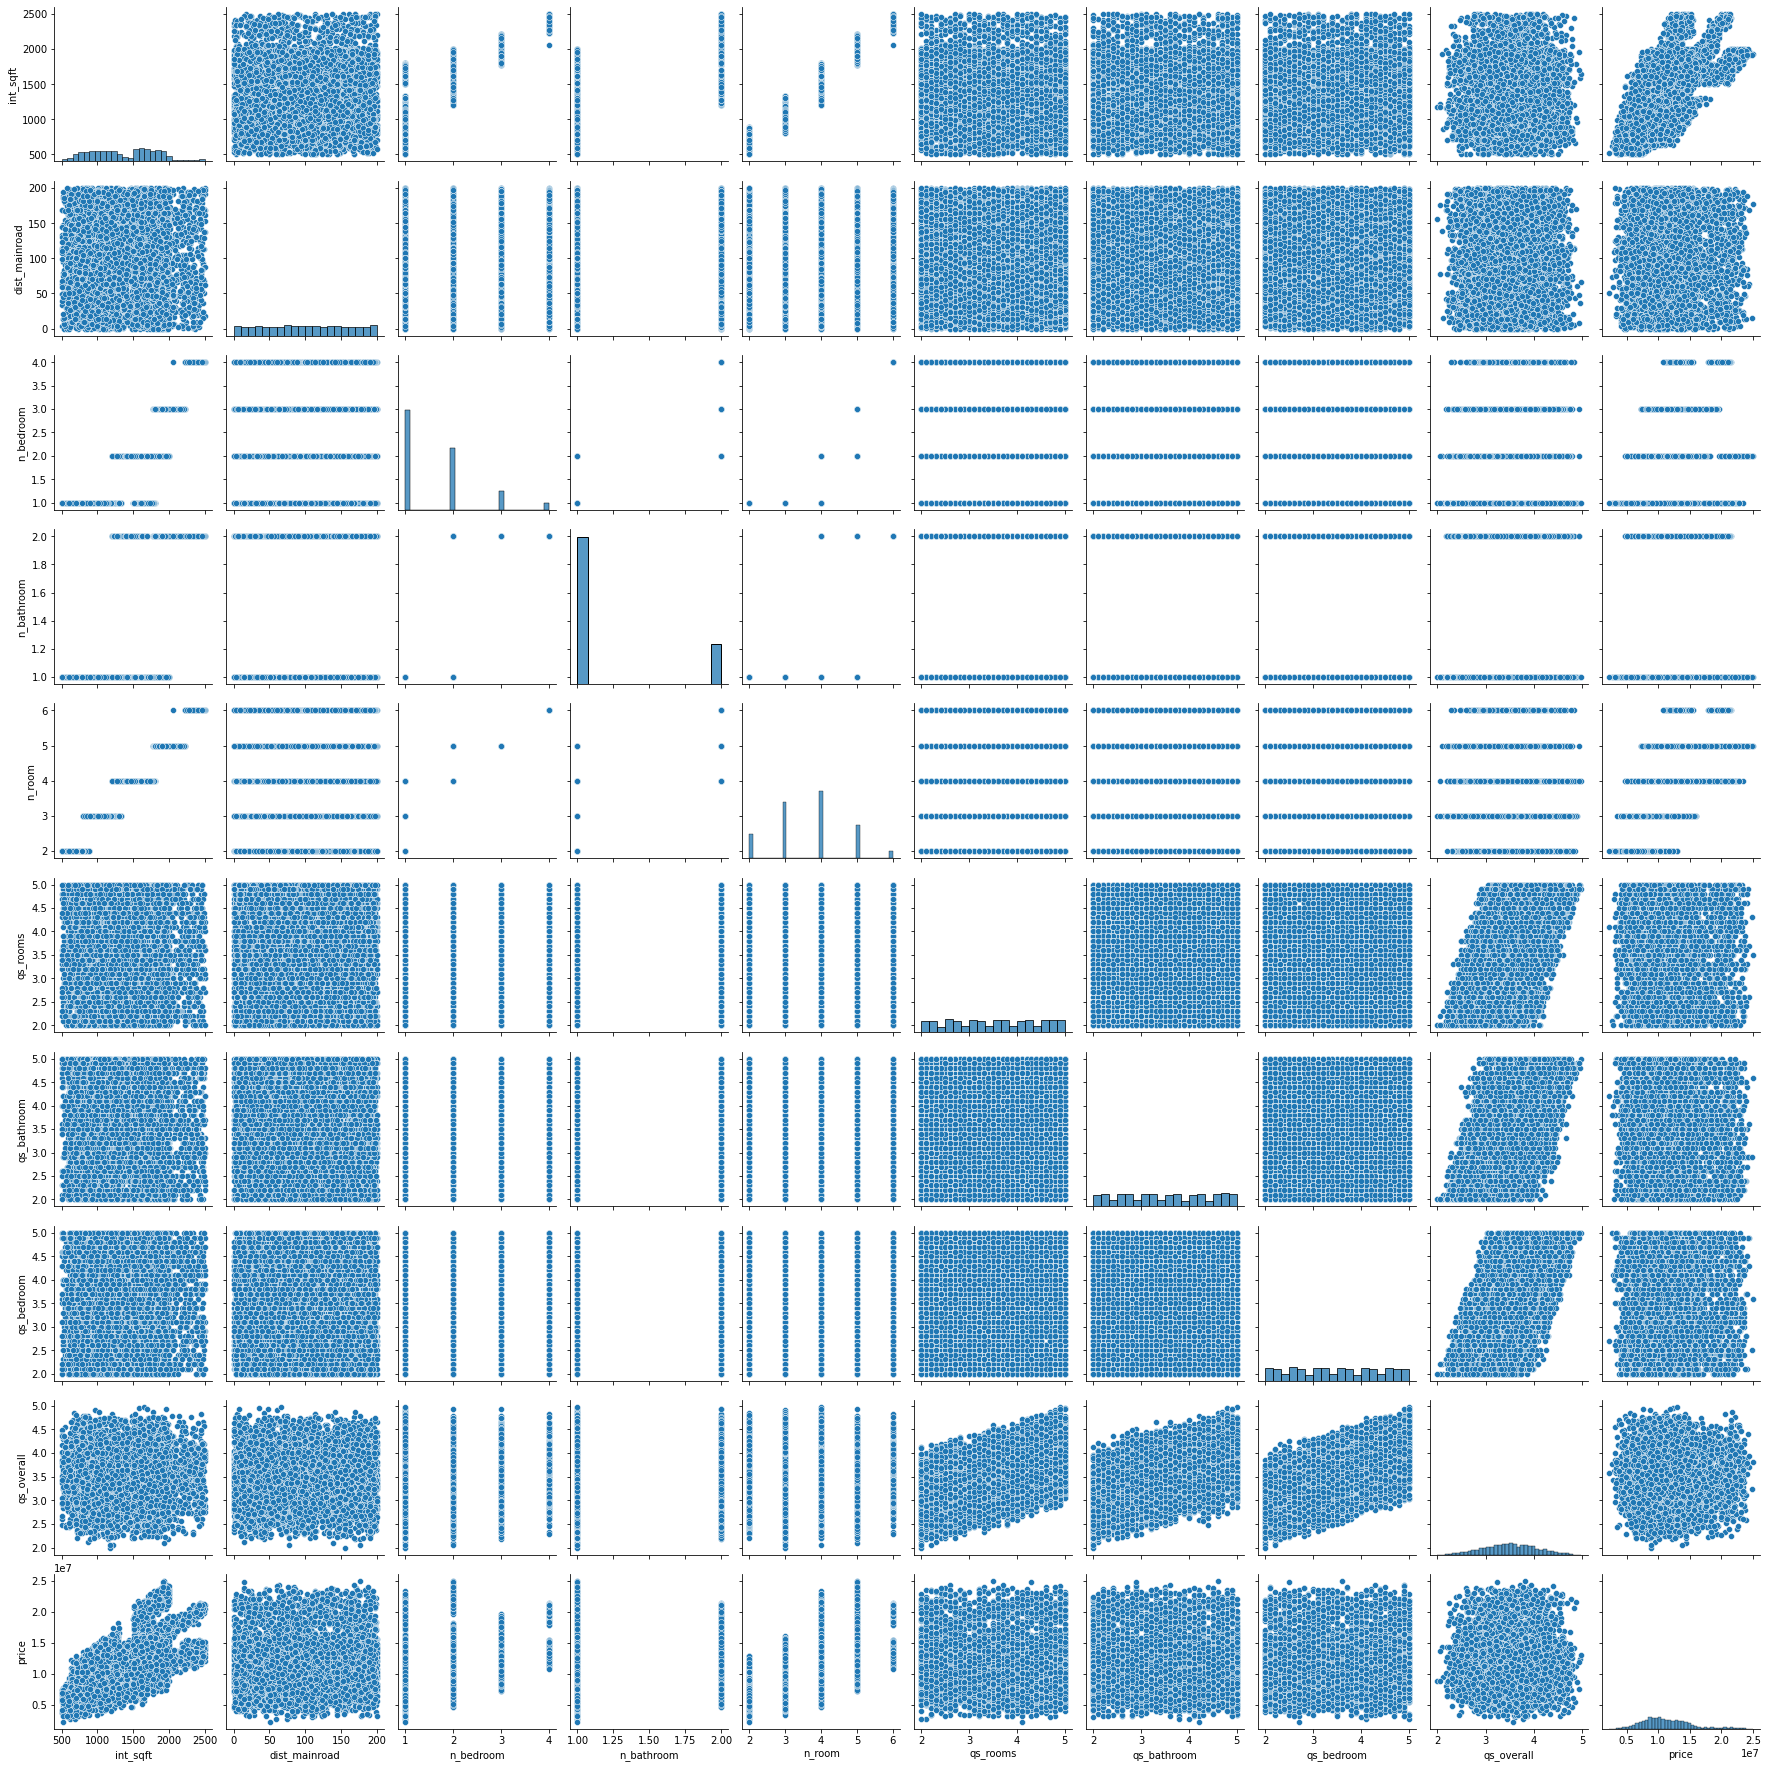

In [13]:
sns.pairplot(df1)

In [14]:
df1.area.value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

In [15]:
df1['area']=[i.lower().replace(" ","_") for i in df1['area']]
df1['area'].unique()

array(['karapakkam', 'anna_nagar', 'adyar', 'velachery', 'chrompet',
       'kk_nagar', 'tnagar', 't_nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana_nagar', 'chormpet', 'adyr', 'velchery', 'ann_nagar',
       'kknagar'], dtype=object)

In [16]:
replacements={'chrompt':'chrompet','chrmpet':'chrompet','chormpet':'chrompet',
              'karapakkam':'karapakam','tnagar':'t_nagar','adyr':'adyar',
              'ana_nagar':'anna_nagar','ann_nagar':'anna_nagar',
              'velchery':'velachery','kknagar':'kk_nagar'}
df1['area']=df1['area'].replace(replacements)
df1.area.unique()

array(['karapakam', 'anna_nagar', 'adyar', 'velachery', 'chrompet',
       'kk_nagar', 't_nagar'], dtype=object)

In [17]:
area_=df1.groupby('area')['price'].mean().sort_values()
area_

area
karapakam     7.755529e+06
adyar         9.574888e+06
chrompet      1.039974e+07
velachery     1.158924e+07
kk_nagar      1.343024e+07
anna_nagar    1.584768e+07
t_nagar       1.632603e+07
Name: price, dtype: float64

In [18]:
fig=px.bar(area_,color=area_,text_auto=True)
fig.update_layout(
      xaxis_title='area',
      yaxis_title='price',
      title='area vs mean_price',
      title_x=0.5
)
fig.show()

[Text(0, 0.5, 'price'),
 Text(0.5, 0, 'int_sqft'),
 Text(0.5, 1.0, 'int_sqft vs mean_price')]

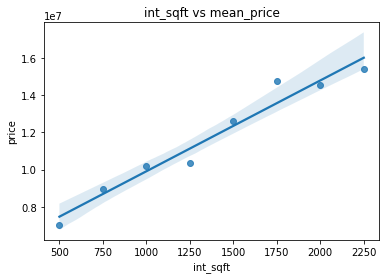

In [19]:
sqft = [df1.loc[(df1.int_sqft > i) & (df1.int_sqft < (i+250)),'price'].mean() for i in range(0,2500,250)]
fig=sns.regplot(x=list(range(0,2500,250)),y=sqft)
fig.set(xlabel='int_sqft',ylabel='price',title='int_sqft vs mean_price')

There is a good corelation between int_sqft and price of the house.

In [20]:
df1.n_bedroom=[int(i) for i in df1.n_bedroom]

In [21]:
n_bedroom=df1.groupby('n_bedroom')['price'].mean()
n_bedroom.index=[str(int(i)) for i in n_bedroom.index]
n_bedroom

1    1.021660e+07
2    1.238704e+07
3    1.314589e+07
4    1.527997e+07
Name: price, dtype: float64

In [22]:
fig=px.bar(n_bedroom,color=n_bedroom,text_auto=True)
fig.update_layout(
          xaxis_title='n_bedrooms',
          yaxis_title='price',
          title='n_bedroom vs mean_price',
          title_x=0.5
)
fig.show()

In [23]:
df1['n_bathroom']=[int(i) for i in df1['n_bathroom']]

In [24]:
n_bathroom=df1.groupby('n_bathroom')['price'].mean()
n_bathroom.index=[str(i) for i in n_bathroom.index]
n_bathroom

1    1.115795e+07
2    1.232071e+07
Name: price, dtype: float64

In [25]:
fig=px.bar(n_bathroom,color=n_bathroom,text_auto=True)
fig.update_layout(
          xaxis_title='n_bathrooms',
          yaxis_title='price',
          title='n_bathroom vs mean_price',
          title_x=0.5
)
fig.show()

In [26]:
df1.n_room.value_counts()

4    2539
3    2112
5    1233
2     919
6     253
Name: n_room, dtype: int64

In [27]:
n_room=df1.groupby('n_room')['price'].mean()
n_room.index=[str(int(i)) for i in n_room.index]
n_room

2    7.311850e+06
3    9.698387e+06
4    1.225637e+07
5    1.483531e+07
6    1.527997e+07
Name: price, dtype: float64

In [28]:
fig=px.bar(n_room,color=n_room,text_auto=True)
fig.update_layout(
          xaxis_title='n_rooms',
          yaxis_title='price',
          title='n_room vs mean_price',
          title_x=0.5
)
fig.show()

In [29]:
df1.sale_cond.value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: sale_cond, dtype: int64

In [30]:
df1.sale_cond=[i.lower().replace(' ','') for i in df1.sale_cond]
df1.sale_cond.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normalsale',
       'partiall'], dtype=object)

In [31]:
# value correction
df1.sale_cond=df1.sale_cond.replace('partiall','partial')
df1.sale_cond.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normalsale'],
      dtype=object)

In [32]:
sale_con=df1.groupby('sale_cond')['price'].mean().sort_values()
sale_con

sale_cond
partial       1.111532e+07
family        1.122977e+07
abnormal      1.143392e+07
normalsale    1.151505e+07
adjland       1.172853e+07
Name: price, dtype: float64

In [33]:
fig=px.bar(sale_con,color=sale_con,text_auto=True)
fig.update_layout(
      xaxis_title='sale_condition',
      yaxis_title='price',
      title='sale_condition vs mean_price',
      title_x=0.5
)
fig.show()

In [34]:
df1.park_facil.value_counts()

Yes    3557
No     3498
Noo       1
Name: park_facil, dtype: int64

In [37]:
df1.park_facil=[i.lower().replace('noo','no') for i in df1.park_facil]

In [38]:
parking=df1.groupby('park_facil')['price'].mean().sort_values()
parking

park_facil
no     1.081936e+07
yes    1.198266e+07
Name: price, dtype: float64

In [39]:
fig=px.bar(parking,color=parking,text_auto=True)
fig.update_layout(
    xaxis_title='parking',
    yaxis_title='price',
    title='parking vs mean_price',
    title_x=0.5
)
fig.show()

In [40]:
df1.buildtype.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [41]:
df1.buildtype=[i.lower().replace('others','other').replace('comercial','commercial') for i in df1.buildtype]
df1.buildtype.value_counts()

house         2433
other         2312
commercial    2311
Name: buildtype, dtype: int64

In [42]:
build=df1.groupby('buildtype')['price'].mean().sort_values()
build

buildtype
house         9.529044e+06
other         1.025933e+07
commercial    1.452859e+07
Name: price, dtype: float64

In [43]:
fig=px.bar(build,color=build,text_auto=True)
fig.update_layout(
    xaxis_title='buildtype',
    yaxis_title='price',
    title='buildtype vs mean_price',
    title_x=0.5
)
fig.show()

In [44]:
df1.utility_avail.value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: utility_avail, dtype: int64

In [45]:
df1.utility_avail=[i.lower().replace(' ','').replace('nosewa','nosewr') for i in df1.utility_avail]

In [46]:
util=df1.groupby('utility_avail')['price'].mean().sort_values()
util

utility_avail
elo       1.093479e+07
nosewr    1.142816e+07
allpub    1.174107e+07
Name: price, dtype: float64

In [47]:
fig=px.bar(util,color=util,text_auto=True)
fig.update_layout(
    xaxis_title='utility_avail',
    yaxis_title='price',
    title='utility_avail vs mean_price',
    title_x=0.5
)
fig.show()

In [48]:
df1.street.value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [49]:
df1.street=[i.lower().replace(' ','').replace('pavd','paved') for i in df1.street]

In [50]:
street=df1.groupby('street')['price'].mean().sort_values()
street

street
noaccess    1.044486e+07
paved       1.158753e+07
gravel      1.198842e+07
Name: price, dtype: float64

In [51]:
fig=px.bar(street,color=street,text_auto=True)
fig.update_layout(
    xaxis_title='street',
    yaxis_title='price',
    title='street vs mean_price',
    title_x=0.5
)
fig.show()

In [52]:
df1.mzzone.value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: mzzone, dtype: int64

In [53]:
df1.mzzone=[i.lower() for i in df1.mzzone]
zone=df1.groupby('mzzone')['price'].mean().sort_values()
zone

mzzone
a     7.642755e+06
c     8.460477e+06
i     9.168181e+06
rh    1.155339e+07
rl    1.231175e+07
rm    1.297931e+07
Name: price, dtype: float64

In [54]:
fig=px.bar(zone,color=zone,text_auto=True)
fig.update_layout(
    xaxis_title='mzzone',
    yaxis_title='price',
    title='mzzone vs mean_price',
    title_x=0.5
)
fig.show()

In [55]:
# calculate age of building from date_buils and date_sale
df1.date_sale=pd.to_datetime(df1['date_sale']).dt.year
df1.date_build=pd.to_datetime(df1['date_build']).dt.year
df1['build_age']=df1['date_sale']-df1['date_build']

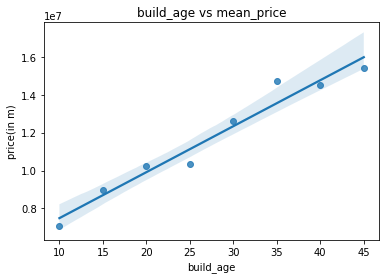

In [56]:
age = [df1.loc[(df1.build_age > i) & (df1.build_age < (i+5)),'price'].mean() for i in range(0,50,5)]
fig=sns.regplot(x=list(range(0,50,5)),y=sqft)
fig.set(xlabel='build_age',ylabel='price(in m)',title='build_age vs mean_price')
plt.show()

In [57]:
# remove date_build and date_sale
df1=df1.drop(['date_build','date_sale'],axis=1)

### encoding

In [58]:
# dividing into dependent and independent variable
X=df1.drop('price',axis=1)
y=df1['price']

In [59]:
# encoding area'
# assumng there is an order in area w.r.t price we are encoding manually
replacements1={
    'karapakam':0,
    'adyar':1,
    'chrompet':2,
    'velachery':3,
    'kk_nagar':4,
    'anna_nagar':5,
    't_nagar':6
}
X['area']=X['area'].replace(replacements1)
replacements2={
    'a':0,
    'c':1,
    'i':2,
    'rh':3,
    'rl':4,
    'rm':5
}
X.mzzone=X.mzzone.replace(replacements2)

In [60]:
sale=pd.get_dummies(X['sale_cond'],drop_first=True)
park=pd.get_dummies(X['park_facil'],drop_first=True)
build=pd.get_dummies(X['buildtype'],drop_first=True)
util=pd.get_dummies(X['utility_avail'],drop_first=True)
street=pd.get_dummies(X['street'],drop_first=True)

In [61]:
X=X.drop(['sale_cond','park_facil','buildtype','utility_avail','street'],axis=1)
X=pd.concat([X,sale,park,build,util,street],axis=1)

In [62]:
X.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,mzzone,qs_rooms,qs_bathroom,qs_bedroom,...,family,normalsale,partial,yes,house,other,elo,nosewr,noaccess,paved
0,0,1004,131,1,1,3,0,4.0,3.9,4.9,...,0,0,0,1,0,0,0,0,0,1
1,5,1986,26,2,1,5,3,4.9,4.2,2.5,...,0,0,0,0,0,0,0,0,0,0
2,1,909,70,1,1,3,4,4.1,3.8,2.2,...,0,0,0,1,0,0,1,0,0,0
3,3,1855,14,3,2,5,2,4.7,3.9,3.6,...,1,0,0,0,0,1,0,1,0,1
4,0,1226,84,1,1,3,1,3.0,2.5,4.1,...,0,0,0,1,0,1,0,0,0,0


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           7056 non-null   int64  
 1   int_sqft       7056 non-null   int64  
 2   dist_mainroad  7056 non-null   int64  
 3   n_bedroom      7056 non-null   int64  
 4   n_bathroom     7056 non-null   int64  
 5   n_room         7056 non-null   int64  
 6   mzzone         7056 non-null   int64  
 7   qs_rooms       7056 non-null   float64
 8   qs_bathroom    7056 non-null   float64
 9   qs_bedroom     7056 non-null   float64
 10  qs_overall     7056 non-null   float64
 11  build_age      7056 non-null   int64  
 12  adjland        7056 non-null   uint8  
 13  family         7056 non-null   uint8  
 14  normalsale     7056 non-null   uint8  
 15  partial        7056 non-null   uint8  
 16  yes            7056 non-null   uint8  
 17  house          7056 non-null   uint8  
 18  other   

# machine_learning

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [66]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(model.coef_)

[ 1073865.72884656   812151.96377043     9742.47563804 -1279338.04255682
    97573.97566574  1742103.27815556   921195.24337692   -68648.43054356
   -92961.54099402   -78085.70272093   182125.31561786  -240742.74231607
   165176.00088879   -55102.62306687    24280.20761509  -140720.56812122
    -9114.04948151   539472.52467196   750812.68215032 -1571172.0571669
  -128354.2838663  -1215748.19880118   378484.36205263   297188.84365681
   253485.56332888   294875.69139143  -466702.71914741  -263199.47370723]


In [ ]:
print(model.intercept_)

11448981.778525868


In [ ]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([15087152.87008441,  6807433.4864501 , 13794405.82476499, ...,
       11983769.94803337, 12508360.99868254,  8935849.11786614])

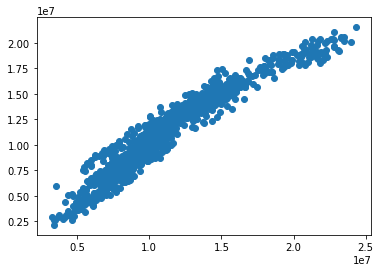

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
res=y_test-y_pred
res

3716    1.323251e+05
6042    1.359252e+06
4778   -6.221278e+05
2710   -2.072370e+05
5190   -6.908278e+05
            ...     
6318    3.002495e+04
1177   -2.500876e+05
4960   -4.940279e+05
3181   -1.220604e+06
1551   -4.787131e+05
Name: price, Length: 1412, dtype: float64

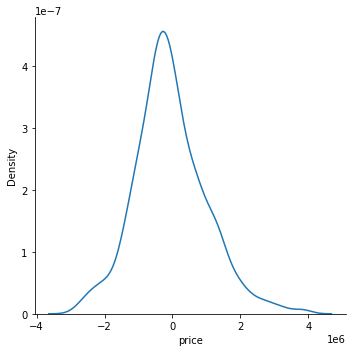

In [ ]:
sns.displot(res,kind="kde")

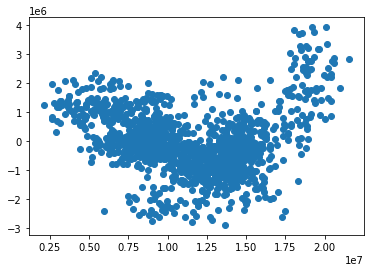

In [ ]:
plt.scatter(y_pred,res)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr_score=r2_score(y_test,y_pred)

In [ ]:
print('mse :',mean_squared_error(y_test,y_pred))
print('rmse :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mae :',mean_absolute_error(y_test,y_pred))
print('r2_score :',lr_score)

mse : 1130419833188.4912
rmse : 1063212.0358557324
mae : 816021.5686508879
r2_score : 0.9243707895775123


## decision_tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dt.predict(X_test)
y_pred

array([15245971.,  7781522., 12955712., ..., 12222704., 11230678.,
        8759570.])

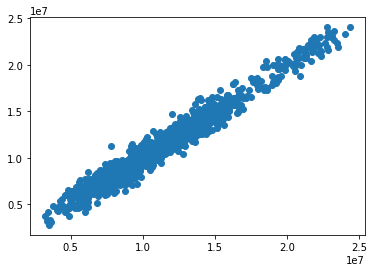

In [ ]:
plt.scatter(y_test,y_pred)

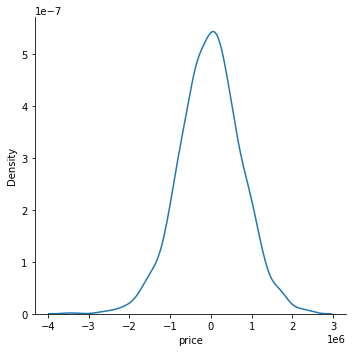

In [ ]:
residual=y_test-y_pred
sns.displot(residual,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
dt_score=r2_score(y_test,y_pred)

In [ ]:
print('mse :',mean_squared_error(y_test,y_pred))
print('rmse :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mae :',mean_absolute_error(y_test,y_pred))
print('r2_score :',dt_score)

mse : 571709154593.6133
rmse : 756114.5115613198
mae : 591606.4093484419
r2_score : 0.961750572058467


## XGB

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

[19:12:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred=xgb.predict(X_test)

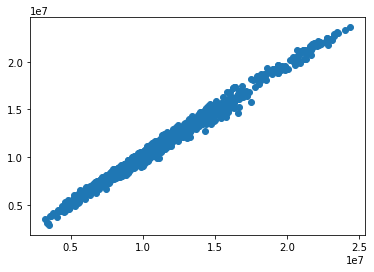

In [ ]:
plt.scatter(y_test,y_pred)

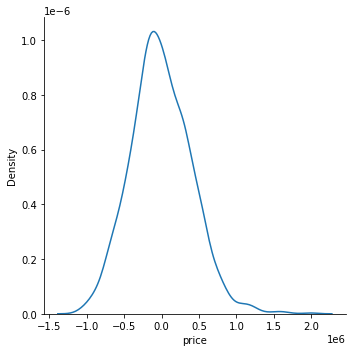

In [ ]:
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
xgb_score=r2_score(y_test,y_pred)

In [ ]:
# validation
print('mse :',mean_squared_error(y_test,y_pred))
print('rmse :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mae :',mean_absolute_error(y_test,y_pred))
print('r2_score :',xgb_score)

mse : 164055497936.82605
rmse : 405037.6500238293
mae : 318674.40793201135
r2_score : 0.9890240887410533


In [ ]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
# check model scores
data={
    "regression":lr_score,
    "tree":dt_score,
    "xgb":xgb_score
}
model_score=pd.DataFrame(data,index=['r2_score'])
model_score

,regression,tree,xgb
r2_score,0.924371,0.961751,0.989024


From the above model XGB is performing well so we are using XGBRegressor.

In [ ]:
# model tuning

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
for lr in [0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1.0]:
  model = XGBRegressor(learning_rate = lr, n_estimators = 100, verbosity = 0,max_depth=5,random_state=5)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  score = r2_score(y_test,y_pred)
  print(f' Learning_rate :{lr}, R2 Score : {score}, Cross_val : {np.mean(cross_val_score(model, X_train, y_train, cv = 10,scoring="r2"))} ')

 Learning_rate :0.04, R2 Score : 0.9810389875203572, Cross_val : 0.9813493175251484 
 Learning_rate :0.05, R2 Score : 0.9877558486667292, Cross_val : 0.9881185929077254 
 Learning_rate :0.06, R2 Score : 0.9910858844605404, Cross_val : 0.9909876725406507 
 Learning_rate :0.07, R2 Score : 0.9924501287942631, Cross_val : 0.9926402011658209 
 Learning_rate :0.08, R2 Score : 0.9938941441472571, Cross_val : 0.9936892886597495 
 Learning_rate :0.09, R2 Score : 0.9944998124732429, Cross_val : 0.9944332434600011 
 Learning_rate :0.1, R2 Score : 0.9951209093130865, Cross_val : 0.9950010189484383 
 Learning_rate :0.2, R2 Score : 0.9965573185687108, Cross_val : 0.9960179642369793 
 Learning_rate :0.3, R2 Score : 0.9953611565871581, Cross_val : 0.9951292185447789 
 Learning_rate :0.4, R2 Score : 0.9944202843391428, Cross_val : 0.9939234937329694 
 Learning_rate :0.5, R2 Score : 0.9925113184325668, Cross_val : 0.9924522255887407 
 Learning_rate :0.6, R2 Score : 0.9924028795455982, Cross_val : 0.9909

In [ ]:
# selecting best model
xgb=XGBRegressor(learning_rate=0.07,n_estimators=100,verbosity=0,max_depth=5,random_state=5)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

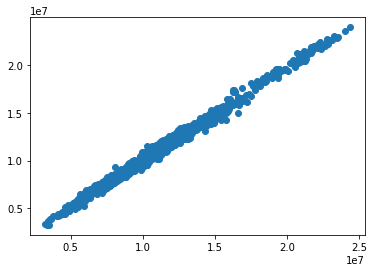

In [ ]:
plt.scatter(y_test,y_pred)

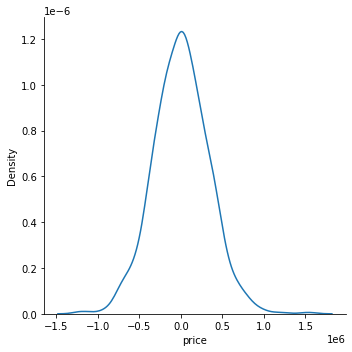

In [ ]:
residuals=y_test-y_pred
sns.displot(residuals,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
xgb_score=r2_score(y_test,y_pred)

In [ ]:
# validation
print('mse :',mean_squared_error(y_test,y_pred))
print('rmse :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mae :',mean_absolute_error(y_test,y_pred))
print('r2_score :',xgb_score)

mse : 112846929133.69458
rmse : 335926.96994093014
mae : 261571.53151558075
r2_score : 0.9924501287942631


# save model

In [ ]:
import pickle
pickle.dump(xgb,open('HousePrice.pkl','wb'))